<a href="https://colab.research.google.com/github/Tejaswi-Mahadev/RL_HA/blob/main/MultiArmBanditProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**The Multi-Armed Bandit (MAB) Problem**:

The name comes from "one-armed bandit," a colloquial term for slot machines.

Imagine you're in a casino with multiple slot machines (arms), each with an unknown probability of giving a reward. Your goal is to maximize your total reward over time by deciding which machines to play.

Real-world applications include:

**Online Advertising**: Choosing which ads to show to maximize clicks

**Website Optimization**: Testing different versions of web pages

**Clinical Trials**: Balancing exploration of new treatments with using known effective ones

**Recommendation Systems**: Selecting items to recommend to users

##**The UCB Algorithm**:

UCB (Upper Confidence Bound) is a sophisticated strategy that balances two crucial aspects:

**Exploitation**: Using arms that have shown good results

**Exploration**: Trying arms that haven't been pulled much to gather more information

The UCB formula used in our implementation is:

                       
                               UCB = x̄ᵢ + √(2 log n / nᵢ)

Where:

**x̄ᵢ** is the average reward for arm **i**

**n** is the total number of pulls

**nᵢ** is the number of times arm i was pulled

##**Core Components and Their Purpose**:


a) **MultiArmedBandit Class**:

Simulates a real-world environment with multiple choices (arms)
Each arm has a hidden true reward probability
Tracks the optimal arm (best choice) for regret calculation

Methods:

**pull(arm)**: Simulates playing a slot machine

**get_regret(chosen_arm)**: Calculates opportunity cost of each choice



b) **UCBPlayer Class**:

Implements the decision-making agent

**Key attributes**:

*counts* : Tracks how often each arm is pulled

*values* : Stores average rewards for each arm

*ucb_values_history* : Records UCB calculations over time


**Methods**:

*select_arm()* : Chooses next arm using UCB formula

*update (chosen_arm, reward)* : Updates knowledge after each pull



**The UCB Algorithm Formula**:

       CopyUCB = average_reward + sqrt(2 * log(total_pulls) / arm_pulls)

average_reward: Exploitation component

sqrt(2 * log(total_pulls) / arm_pulls): Exploration bonus

Larger bonus for less-pulled arms

Bonus decreases as we pull an arm more


**Performance Metrics**:

a) Cumulative Rewards:
Total rewards gained over time
Higher is better
Should show increasing slope

b) Regret:
Difference between optimal and actual rewards
Lower is better
Should show decreasing slope over time

c) Arm Selection Distribution:
Shows how often each arm was chosen
Should correlate with true rewards
Best arm should be pulled most frequently


Visualization Features:

a) Four Main Plots:

Cumulative Rewards: Shows overall performance

Arm Selection Distribution: Shows learning effectiveness

Cumulative Regret: Shows efficiency of learning

UCB Values vs True Rewards: Shows accuracy of estimates




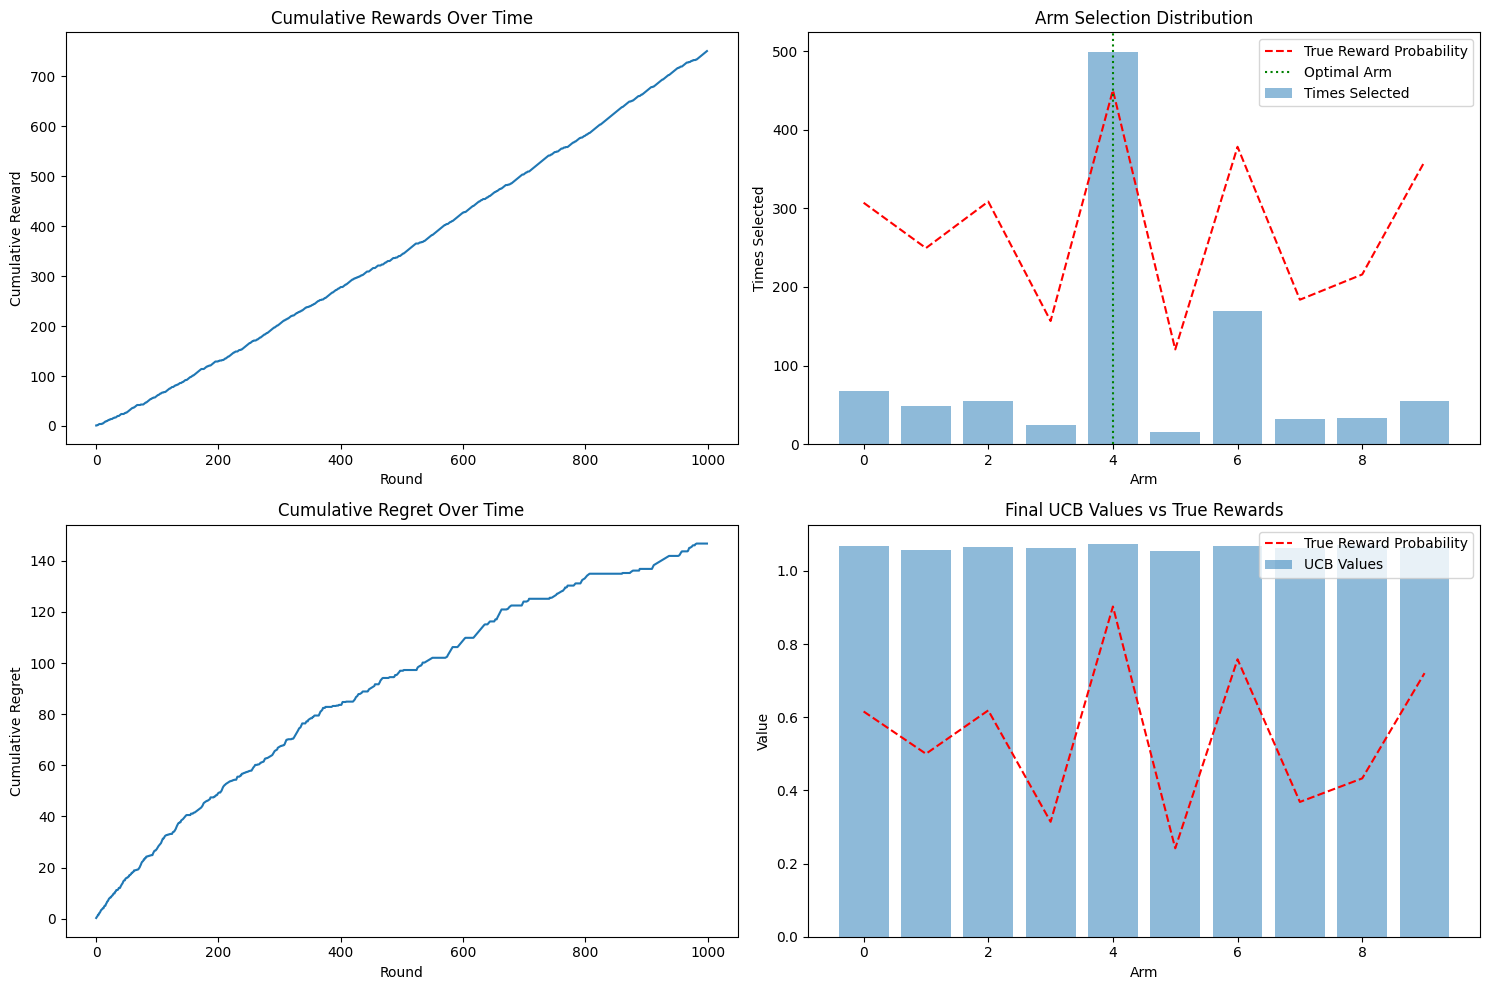

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log

class MultiArmedBandit:
    def __init__(self, n_arms, true_rewards):
        self.n_arms = n_arms
        self.true_rewards = true_rewards
        self.optimal_arm = np.argmax(true_rewards)
        self.optimal_reward = true_rewards[self.optimal_arm]

    def pull(self, arm):
        return 1 if np.random.random() < self.true_rewards[arm] else 0

    def get_regret(self, chosen_arm):
        """Calculate regret for the chosen arm"""
        return self.optimal_reward - self.true_rewards[chosen_arm]

class UCBPlayer:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_pulls = 0
        self.ucb_values_history = []

    def select_arm(self):
        for arm in range(self.n_arms):
            if self.counts[arm] == 0:
                return arm

        ucb_values = np.zeros(self.n_arms)
        for arm in range(self.n_arms):
            bonus = sqrt((2 * log(self.total_pulls)) / self.counts[arm])
            ucb_values[arm] = self.values[arm] + bonus

        self.ucb_values_history.append(ucb_values.copy())
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.total_pulls += 1
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value

def run_simulation(n_arms=10, n_rounds=1000):
    # Set true reward probabilities
    true_rewards = np.random.beta(2, 2, n_arms)

    # Initialize environment and player
    env = MultiArmedBandit(n_arms, true_rewards)
    player = UCBPlayer(n_arms)

    # Track results
    cumulative_reward = 0
    cumulative_rewards = []
    chosen_arms = []
    cumulative_regret = 0
    regret_history = []

    # Run simulation
    for round in range(n_rounds):
        chosen_arm = player.select_arm()
        chosen_arms.append(chosen_arm)

        # Get reward and update metrics
        reward = env.pull(chosen_arm)
        cumulative_reward += reward
        cumulative_rewards.append(cumulative_reward)

        # Calculate and store regret
        round_regret = env.get_regret(chosen_arm)
        cumulative_regret += round_regret
        regret_history.append(cumulative_regret)

        player.update(chosen_arm, reward)

    return {
        'cumulative_rewards': cumulative_rewards,
        'chosen_arms': chosen_arms,
        'true_rewards': true_rewards,
        'regret_history': regret_history,
        'ucb_values_history': player.ucb_values_history,
        'optimal_arm': env.optimal_arm
    }

def plot_comprehensive_results(results):
    """Plot comprehensive analysis of the simulation results"""
    plt.figure(figsize=(15, 10))

    # Plot cumulative rewards
    plt.subplot(2, 2, 1)
    plt.plot(results['cumulative_rewards'])
    plt.title('Cumulative Rewards Over Time')
    plt.xlabel('Round')
    plt.ylabel('Cumulative Reward')

    # Plot arm selection distribution
    plt.subplot(2, 2, 2)
    arm_counts = [results['chosen_arms'].count(i) for i in range(len(results['true_rewards']))]
    plt.bar(range(len(results['true_rewards'])), arm_counts, alpha=0.5, label='Times Selected')
    plt.plot(range(len(results['true_rewards'])),
            results['true_rewards'] * max(arm_counts),
            'r--',
            label='True Reward Probability')
    plt.axvline(x=results['optimal_arm'], color='g', linestyle=':', label='Optimal Arm')
    plt.title('Arm Selection Distribution')
    plt.xlabel('Arm')
    plt.ylabel('Times Selected')
    plt.legend()

    # Plot cumulative regret
    plt.subplot(2, 2, 3)
    plt.plot(results['regret_history'])
    plt.title('Cumulative Regret Over Time')
    plt.xlabel('Round')
    plt.ylabel('Cumulative Regret')

    # Plot final UCB values
    if results['ucb_values_history']:
        plt.subplot(2, 2, 4)
        final_ucb = results['ucb_values_history'][-1]
        plt.bar(range(len(final_ucb)), final_ucb, alpha=0.5, label='UCB Values')
        plt.plot(range(len(results['true_rewards'])),
                results['true_rewards'],
                'r--',
                label='True Reward Probability')
        plt.title('Final UCB Values vs True Rewards')
        plt.xlabel('Arm')
        plt.ylabel('Value')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Run the simulation with random seed for reproducibility
if __name__ == "__main__":
    np.random.seed(42)
    results = run_simulation(n_arms=10, n_rounds=1000)
    plot_comprehensive_results(results)